<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/RandomML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5-fold and 10-fold Cross Validation
Divides into 5-10 equal subsets.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_classification(n_samples = 1000, n_features= 20, random_state =42)

# 5 Fold CV
rf = RandomForestClassifier(n_estimators =100, random_state =42)
cv_5fold = KFold(n_splits = 5, shuffle = True, random_state =42)
scores_5fold = cross_val_score(rf, X,y, cv = cv_5fold, scoring = 'accuracy')

max_5fold = np.max(scores_5fold)

print(scores_5fold)
print(max_5fold)


#10 fold CV
rf = RandomForestClassifier(n_estimators =100, random_state =42)
cv_10fold = KFold(n_splits = 10, shuffle = True, random_state =42)
scores_10fold = cross_val_score(rf, X,y, cv = cv_10fold, scoring = 'accuracy')

print(scores_10fold)

[0.895 0.86  0.935 0.88  0.925]
0.935
[0.88 0.91 0.81 0.93 0.92 0.94 0.88 0.86 0.94 0.89]


AUC- ROC evaluation metrics
- Area Under the Receiver Operating Characteristic Curve

AUC-ROC Score: 0.97


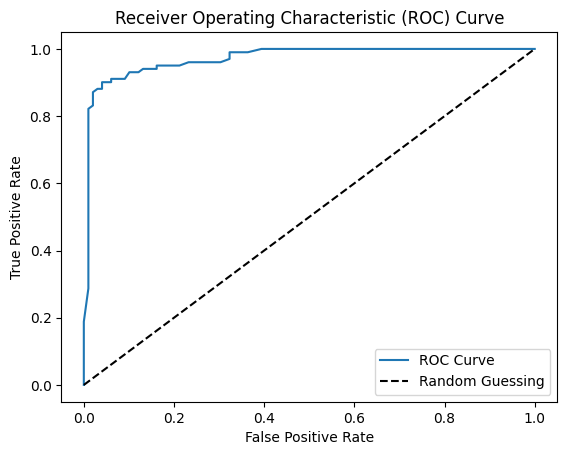

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X,y = make_classification(n_samples = 1000, n_features = 20, random_state =42)

rf = RandomForestClassifier(n_estimators = 100, random_state =42)

cv = KFold(n_splits =5, shuffle = True, random_state = 42)

true_labels = []
predicted_probabilities = []

for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  rf.fit(X_train, y_train)

  y_pred = rf.predict_proba(X_test)[:,1]

true_labels.extend(y_test)
predicted_probabilities.extend(y_pred)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(true_labels, predicted_probabilities)
print("AUC-ROC Score: {:.2f}".format(auc_roc_score))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples =100, n_features = 5)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
rf = RandomForestClassifier().fit(X_train, y_train)

cv = KFold(n_splits =5)

score = cross_val_score(rf,X,y, cv=cv, scoring = 'accuracy')
print(score)



[0.95 0.95 0.85 0.9  0.9 ]
